In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import scipy.stats as stats
import distribution as dist

Life Expectancy Section

In [8]:
# life_exp_df = pd.read_csv("Life_Expectancy_Data.csv")
# life_exp_df.head()
medical_doctors_access_df = pd.read_excel('access.xlsx') 
medical_doctors_access_df.head()

,Unnamed: 0,Age-standardized prevalence of tobacco use among persons 15 years and olders (%),Unnamed: 2,Diphtheria-tetanus-pertussis (DTP3) immunization coverage among 1-year-oldst (%),Measles-containing-vaccine second-dose (MCV2) immunization coverage by the nationally recommended aget (%),Pneumococcal conjugate 3rd dose (PCV3) immunization coverage among 1-year oldst (%),Human papillomavirus (HPV) immunization coverage estimates among 15 year-old girlst (%),"Total net official development assistance to medical research and basic health sectors per capitau (US$), by recipient country\n\n",Proportion of health facilities with a core set of relevant essential medicines available and affordable on a sustainable basisv (%),Unnamed: 9,Density of medical doctorsw (per 10 000 population),Density of nursing and midwifery personnelw (per 10 000 population),Density of dentistsw (per 10 000 population),Density of pharmacistsw (per 10 000 population),Average of 13 International Health Regulations core capacity scoresx,Proportion of bloodstream infections due methicillin-resistant Staphylococcus aureusy (%),Proportion of bloodstream infection due to Escherichia coli resistant to 3rd-generation cephalosporiny (%),Domestic general government health expenditure (GGHE-D) as percentage of general government expenditure (GGE)z (%),Unnamed: 18
0,Afghanistan,23.3,NaN,70,43,68,-,6.15,-,NaN,2.5,4.5,0.7,0.3,41,-,-,3.9,Afghanistan
1,Albania,22.4,aq,98,94,92,-,2.03,-,NaN,18.8,60.5,10.3,10.8,-,-,-,-,Albania
2,Algeria,21,NaN,-,-,-,-,1.26,-,NaN,17.2,15.5,3.7,4.5,77,-,-,10.7,Algeria
3,Andorra,31.8,aq,99,93,96,77,-,-,NaN,33.3,40.1,8.2,10.1,-,-,-,16.5,Andorra
4,Angola,-,NaN,51,41,47,-,1.06,-,NaN,2.1,4.1,0.5,0.7,40,-,-,5.4,Angola


In [11]:
mini_medical_doctors_access_df = medical_doctors_access_df[["Unnamed: 0","Density of medical doctorsw (per 10 000 population) "]]
mini_life_exp_df = mini_medical_doctors_access_df[mini_medical_doctors_access_df['Life expectancy '].notna()]
mini_life_exp_df.head()

KeyError: "['Density of medical doctorsw (per 10 000 population)'] not in index"

Life expectancy 
Mean: 69.22493169398908
Std: 9.523867487824301



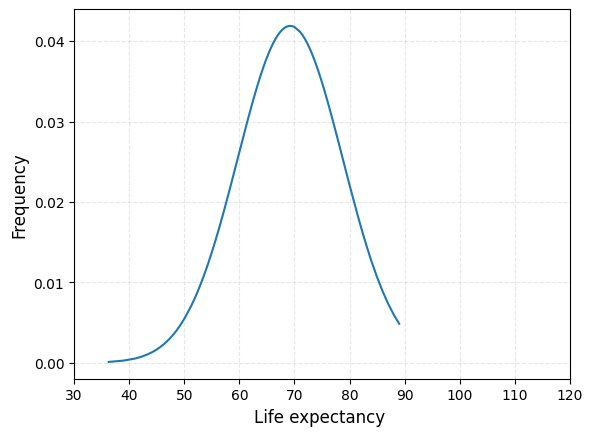

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Life Exp Scaled
0,Afghanistan,2015,65.0,263.0,62,0.544592
1,Afghanistan,2014,59.9,271.0,64,0.447818
2,Afghanistan,2013,59.9,268.0,66,0.447818
3,Afghanistan,2012,59.5,272.0,69,0.440228
4,Afghanistan,2011,59.2,275.0,71,0.434535


In [5]:
life_exp_col = "Life expectancy "
life_exp_mean, life_exp_std = dist.dist_info(mini_life_exp_df, life_exp_col)
dist.dist_plot(mini_life_exp_df, life_exp_col, life_exp_mean, life_exp_std, 30, 120)
mini_life_exp_df = dist.add_norm(mini_life_exp_df, life_exp_col, "Life Exp Scaled")
mini_life_exp_df.head()

Adult Mortality

Adult Mortality
Mean: 163.9241622574956
Std: 124.29355873101485



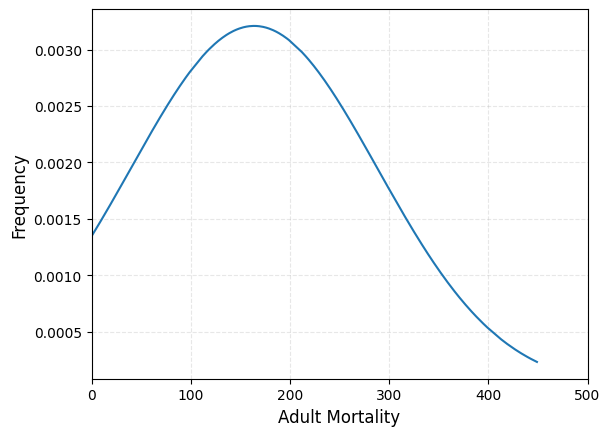

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Life Exp Scaled,Adult Mort Scaled,Infant Death Scaled
0,Afghanistan,2015,65.0,263.0,62,0.544592,0.584821,0.350282
1,Afghanistan,2014,59.9,271.0,64,0.447818,0.602679,0.361582
2,Afghanistan,2013,59.9,268.0,66,0.447818,0.595982,0.372881
3,Afghanistan,2012,59.5,272.0,69,0.440228,0.604911,0.389831
4,Afghanistan,2011,59.2,275.0,71,0.434535,0.611607,0.401130


In [17]:
adult_mort_col = "Adult Mortality"
adult_mort_mean, adult_mort_std = dist.dist_info(mini_life_exp_df, adult_mort_col)
mini_life_exp_df = mini_life_exp_df[mini_life_exp_df[adult_mort_col] < 450]
dist.dist_plot(mini_life_exp_df, adult_mort_col, adult_mort_mean, adult_mort_std, 0, 500)
mini_life_exp_df = dist.add_norm(mini_life_exp_df, adult_mort_col, "Adult Mort Scaled")
mini_life_exp_df.head()

Infant Deaths

infant deaths
Mean: 14.050655976676385
Std: 25.12040243705894



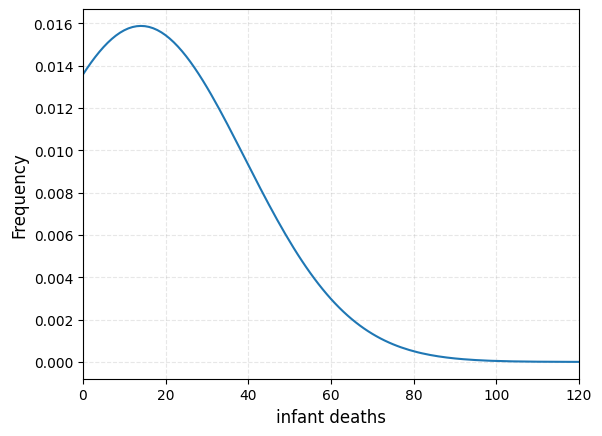

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Life Exp Scaled,Adult Mort Scaled,Infant Death Scaled
0,Afghanistan,2015,65.0,263.0,62,0.544592,0.584821,0.350282
1,Afghanistan,2014,59.9,271.0,64,0.447818,0.602679,0.361582
2,Afghanistan,2013,59.9,268.0,66,0.447818,0.595982,0.372881
3,Afghanistan,2012,59.5,272.0,69,0.440228,0.604911,0.389831
4,Afghanistan,2011,59.2,275.0,71,0.434535,0.611607,0.401130


In [18]:
infant_death_col = "infant deaths"
infant_death_mean, infant_death_std = dist.dist_info(mini_life_exp_df, infant_death_col)
mini_life_exp_df = mini_life_exp_df[mini_life_exp_df[infant_death_col] < 180]
dist.dist_plot(mini_life_exp_df, infant_death_col, infant_death_mean, infant_death_std, 0, 120)
mini_life_exp_df = dist.add_norm(mini_life_exp_df, infant_death_col, "Infant Death Scaled")
mini_life_exp_df.head()